For this Kaggle competition, I will perform simple data wrangling, exploratory data analysis, feature engineering, and finally, modeling. 

### 1. Data Wrangling

In [24]:
# load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as ltb

In [3]:
# load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
# explore the data
train_data.head()

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         24.0                0.39  0.425011   0.417545   
1                  41.2         24.0                0.39  0.444908   0.422051   
2                  50.8         24.0                0.39  0.552927   0.470853   
3                  45.8         24.0                0.39  0.565976   0.478137   
4                  45.8         24.0                0.39  0.579677   0.494165   

       seeds       yield  
0  32.460887  4476.81146  
1  33.858317  5548.12201  
2  38.341781  6869.77760  
3  39.467561  6880.77590  
4  40.484512  7479.93417

In [5]:
# check feature types
train_data.dtypes

id                        int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

In [6]:
# check for NaNs
train_data.isna().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [7]:
# take a quick look at the feature's summary statistics
train_data.describe()

id     clonesize      honeybee       bumbles       andrena  \
count  15289.000000  15289.000000  15289.000000  15289.000000  15289.000000   
mean    7644.000000     19.704690      0.389314      0.286768      0.492675   
std     4413.698468      6.595211      0.361643      0.059917      0.148115   
min        0.000000     10.000000      0.000000      0.000000      0.000000   
25%     3822.000000     12.500000      0.250000      0.250000      0.380000   
50%     7644.000000     25.000000      0.500000      0.250000      0.500000   
75%    11466.000000     25.000000      0.500000      0.380000      0.630000   
max    15288.000000     40.000000     18.430000      0.585000      0.750000   

              osmia  MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count  15289.000000      15289.000000      15289.000000          15289.000000   
mean       0.592355         82.169887         49.673281             68.656256   
std        0.139489          9.146703          5.546405              7.641807   
min        0.000000         69.700000         39.000000             58.200000   
25%        0.500000         77.400000         46.800000             64.700000   
50%        0.630000         86.000000         52.000000             71.900000   
75%        0.750000         86.000000         52.000000             71.900000   
max        0.750000         94.600000         57.200000             79.000000   

       MaxOfLowerTRange  MinOfLowerTRange  AverageOfLowerTRange   RainingDays  \
count      15289.000000      15289.000000          15289.000000  15289.000000   
mean          59.229538         28.660553             48.568500     18.660865   
std            6.610640          3.195367              5.390545     11.657582   
min           50.200000         24.300000             41.200000      1.000000   
25%           55.800000         27.000000             45.800000     16.000000   
50%           62.000000         30.000000             50.800000     16.000000   
75%           62.000000         30.000000             50.800000     24.000000   
max           68.200000         33.000000             55.900000     34.000000   

       AverageRainingDays      fruitset     fruitmass         seeds  \
count        15289.000000  15289.000000  15289.000000  15289.000000   
mean             0.324176      0.502741      0.446553     36.164950   
std              0.163905      0.074390      0.037035      4.031087   
min              0.060000      0.192732      0.311921     22.079199   
25%              0.260000      0.458246      0.419216     33.232449   
50%              0.260000      0.506600      0.446570     36.040675   
75%              0.390000      0.560445      0.474134     39.158238   
max              0.560000      0.652144      0.535660     46.585105   

              yield  
count  15289.000000  
mean    6025.193999  
std     1337.056850  
min     1945.530610  
25%     5128.163510  
50%     6117.475900  
75%     7019.694380  
max     8969.401840

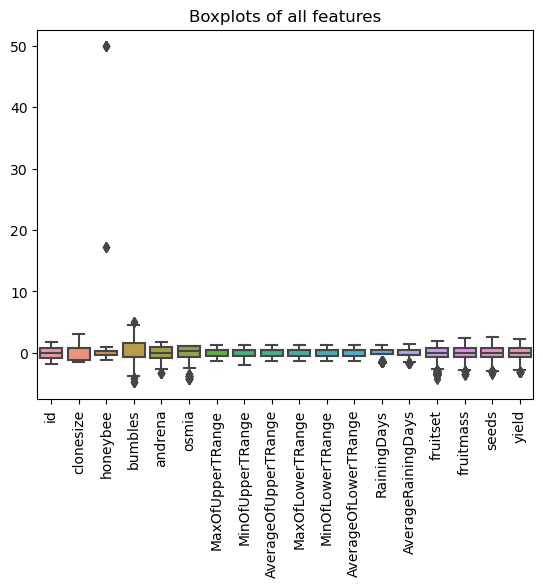

In [13]:
# check for outliers with boxplot
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_data)
train_scaled = pd.DataFrame(train_scaled, columns=scaler.feature_names_in_)

ax = sns.boxplot(data=train_scaled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Boxplots of all features')
plt.show()

From the boxplot, we can see a few outliers present in the scaled data. The most extreme outliers are within the "honeybee" feature. It is important we look at the histogram of this feature and decide whether to remove the extreme values or not.

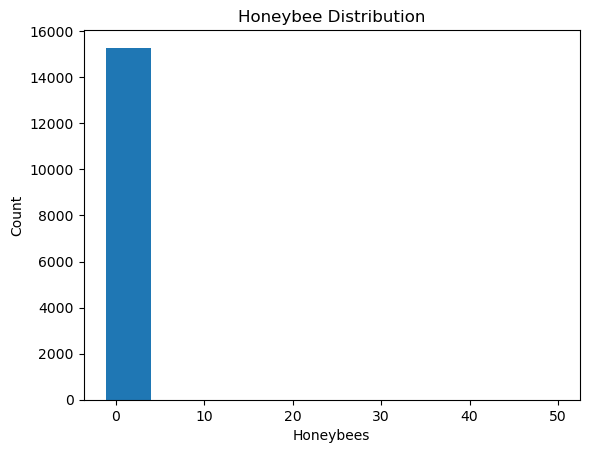

In [10]:
plt.hist(train_scaled['honeybee'])
plt.title('Honeybee Distribution')
plt.xlabel('Honeybees')
plt.ylabel('Count')
plt.show()

We can see from the x axis that there are larger values in the distribution. However, there are few enough that they don't show up compared to the scale of values around zero.

In [14]:
# take a closeup look at the honeybee column
train_data['honeybee'].sort_values(ascending=False).head(10)

11803    18.43
5940     18.43
11948    18.43
2263     18.43
13493    18.43
13132     6.64
15246     6.64
6818      6.64
6931      0.75
4441      0.75
Name: honeybee, dtype: float64

Because this is a competition, the data is very clean already. Furthermore, all of the features are of appropriate types and there are no missing values. The only question marks with the data are with a few outliers. The biggest of outliers being in the 'honeybee' column. There are also less extreme outliers in the 'bumbles', 'andrena', 'osmia', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass' and 'seeds'. We know that the 'honeybee' column represents the honeybee density in the field. However, we do not know enough about the data to know if the outliers are sensible or not. For now, we'll leave them in but maybe remove them later in the modeling phase. Also, for the other (less extreme) outliers, we will leave them for now as they don't seem to be as a result of data errors. 

### 2. EDA

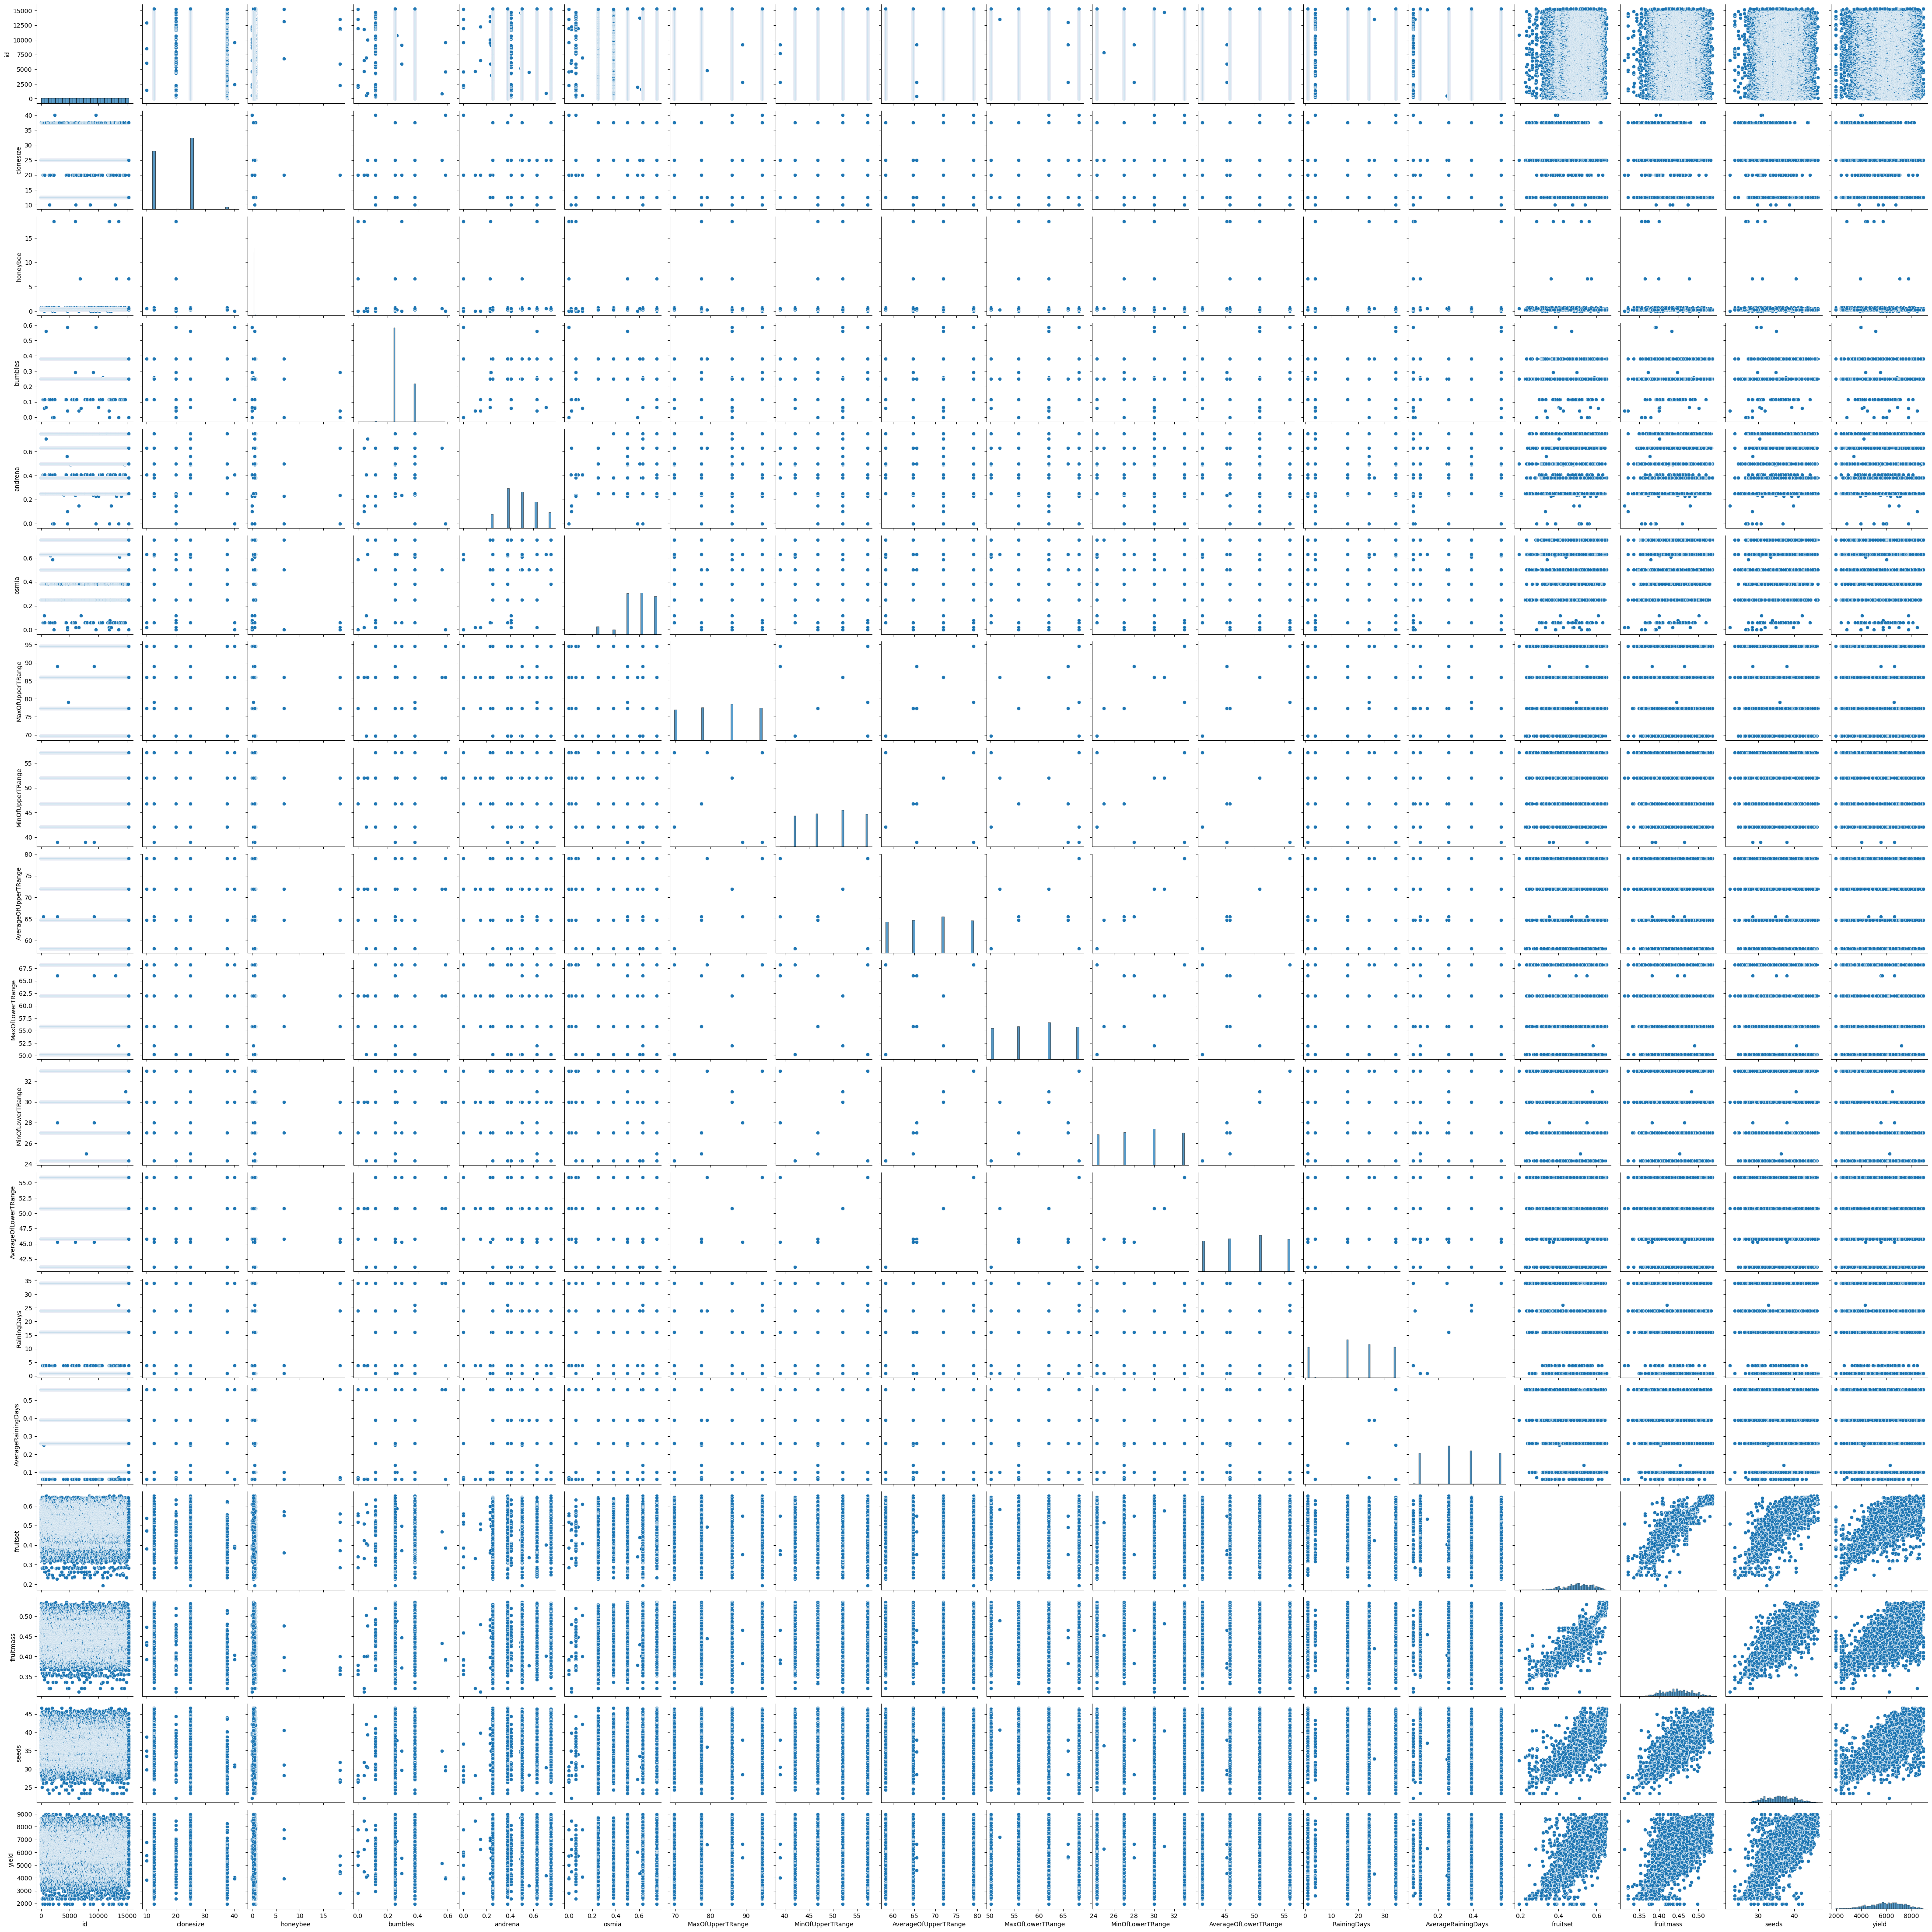

In [40]:
# first we can look at all distributions and the pairplot
sns.pairplot(train_data)
plt.show()

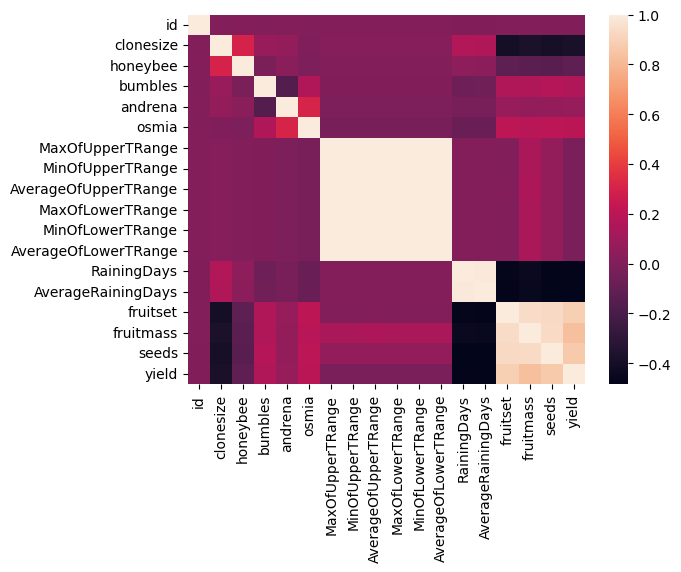

In [11]:
# look at the correlation between all variables
corr_matrix = train_data.corr()

# Make a heatmap of the data 
sns.heatmap(corr_matrix)
plt.show()

The pairplot is hard to decipher given the number of observations. However, we can get some usefull information from the correlation heatmap. We can see that several variables are highly (and negatively) correlated with yield. Moreover, 'fruitset', 'fruitmass', and 'seeds' are highly correlated with yield. This is not a huge surpise, as these are the features that are directly correlated with blueberry yield. However, there are a few other features that are strongly negatively correlated with yield. These features include 'clonesize', 'RainingDays', and 'AverageRainingDays'. 

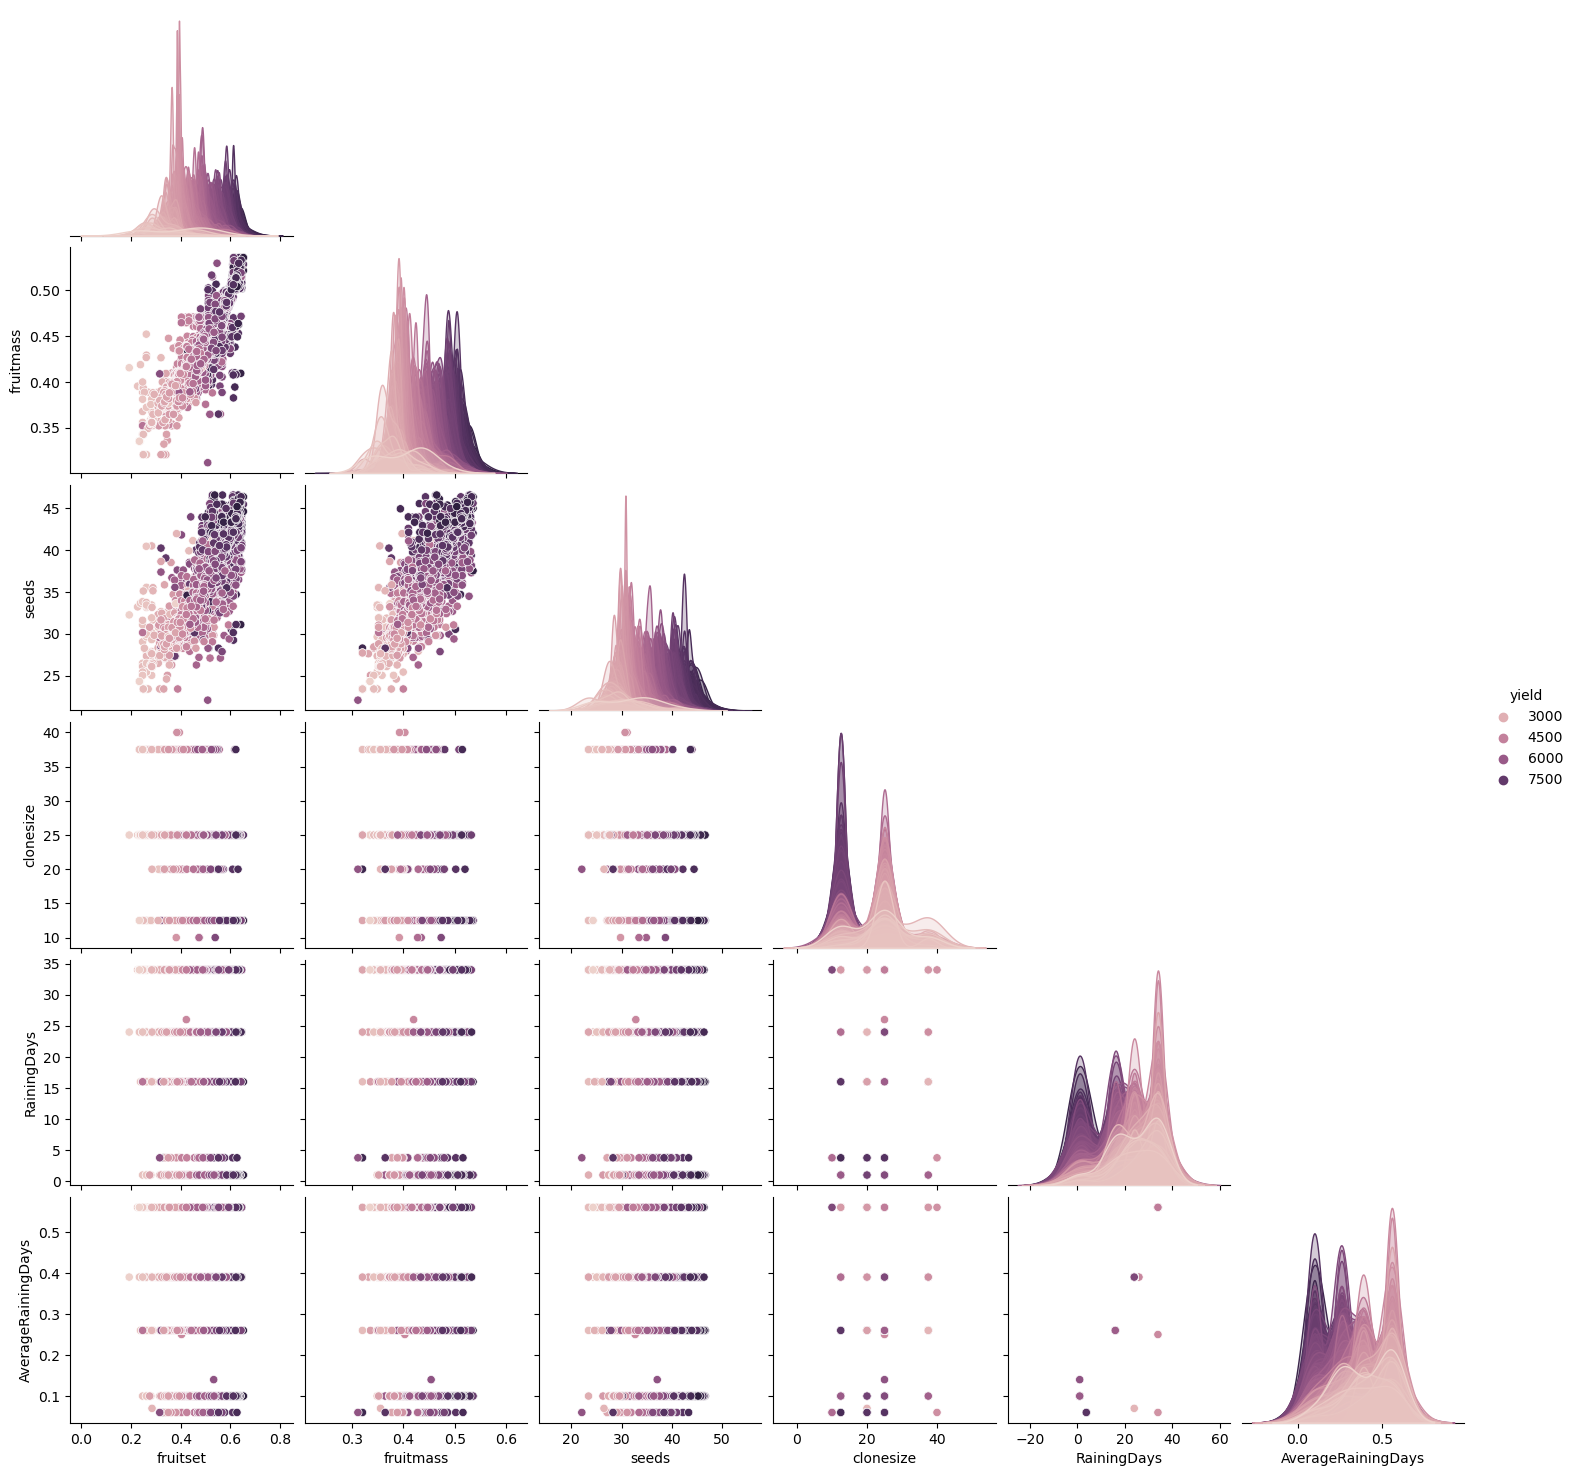

In [12]:
# generate new pairplot with correlated features
temp_set = train_data[['fruitset', 'fruitmass', 'seeds', 'clonesize', 'RainingDays', 'AverageRainingDays', 'yield']]
sns.pairplot(temp_set, hue='yield', corner=True)
plt.show()

This pairplot is more helpful than the previous. We can see that there are some trends in the yield distributions. In the histograms (plotted on the diagonal), we can see for most features, some sort of separation in the yield values. For example, there tends to be less yield with lower fruitset values. Or on the other hand, a higher yield with a lower clonesize. 

We will make a collection of smaller training and testing sets using these features. We will also perform PCA later to see if other features are important as well. 

I want to now create a few new variables. One will combine fruitset and seeds since they are important to yield. Another feature I want to generate combines all of the "bee" features into one. After I generate these, I will recreate the two plots above.

In [16]:
# new features
train_data['seed_fruitset'] = train_data['fruitset'] * train_data['seeds']
test_data['seed_fruitset'] = test_data['fruitset'] * test_data['seeds']

train_data['bees'] = train_data['honeybee'] + train_data['bumbles'] + train_data['andrena'] + train_data['osmia']
test_data['bees'] = test_data['honeybee'] + test_data['bumbles'] + test_data['andrena'] + test_data['osmia']

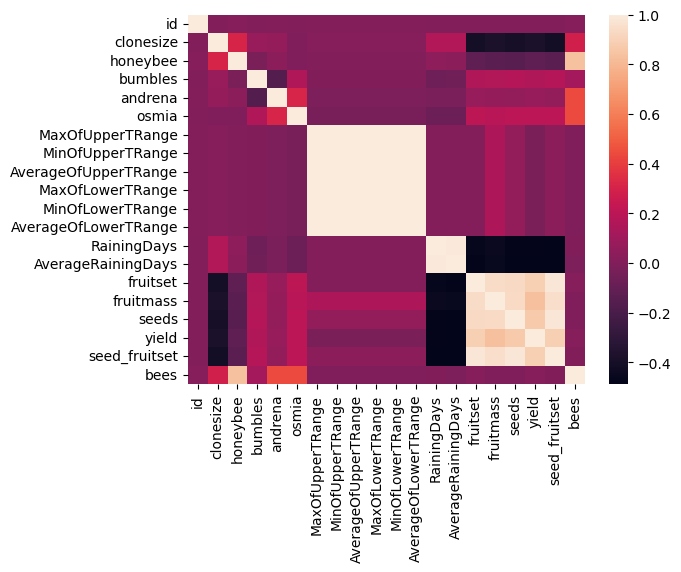

In [14]:
# look at the correlation again between all variables
corr_matrix = train_data.corr()

# Make a heatmap of the data 
sns.heatmap(corr_matrix)
plt.show()

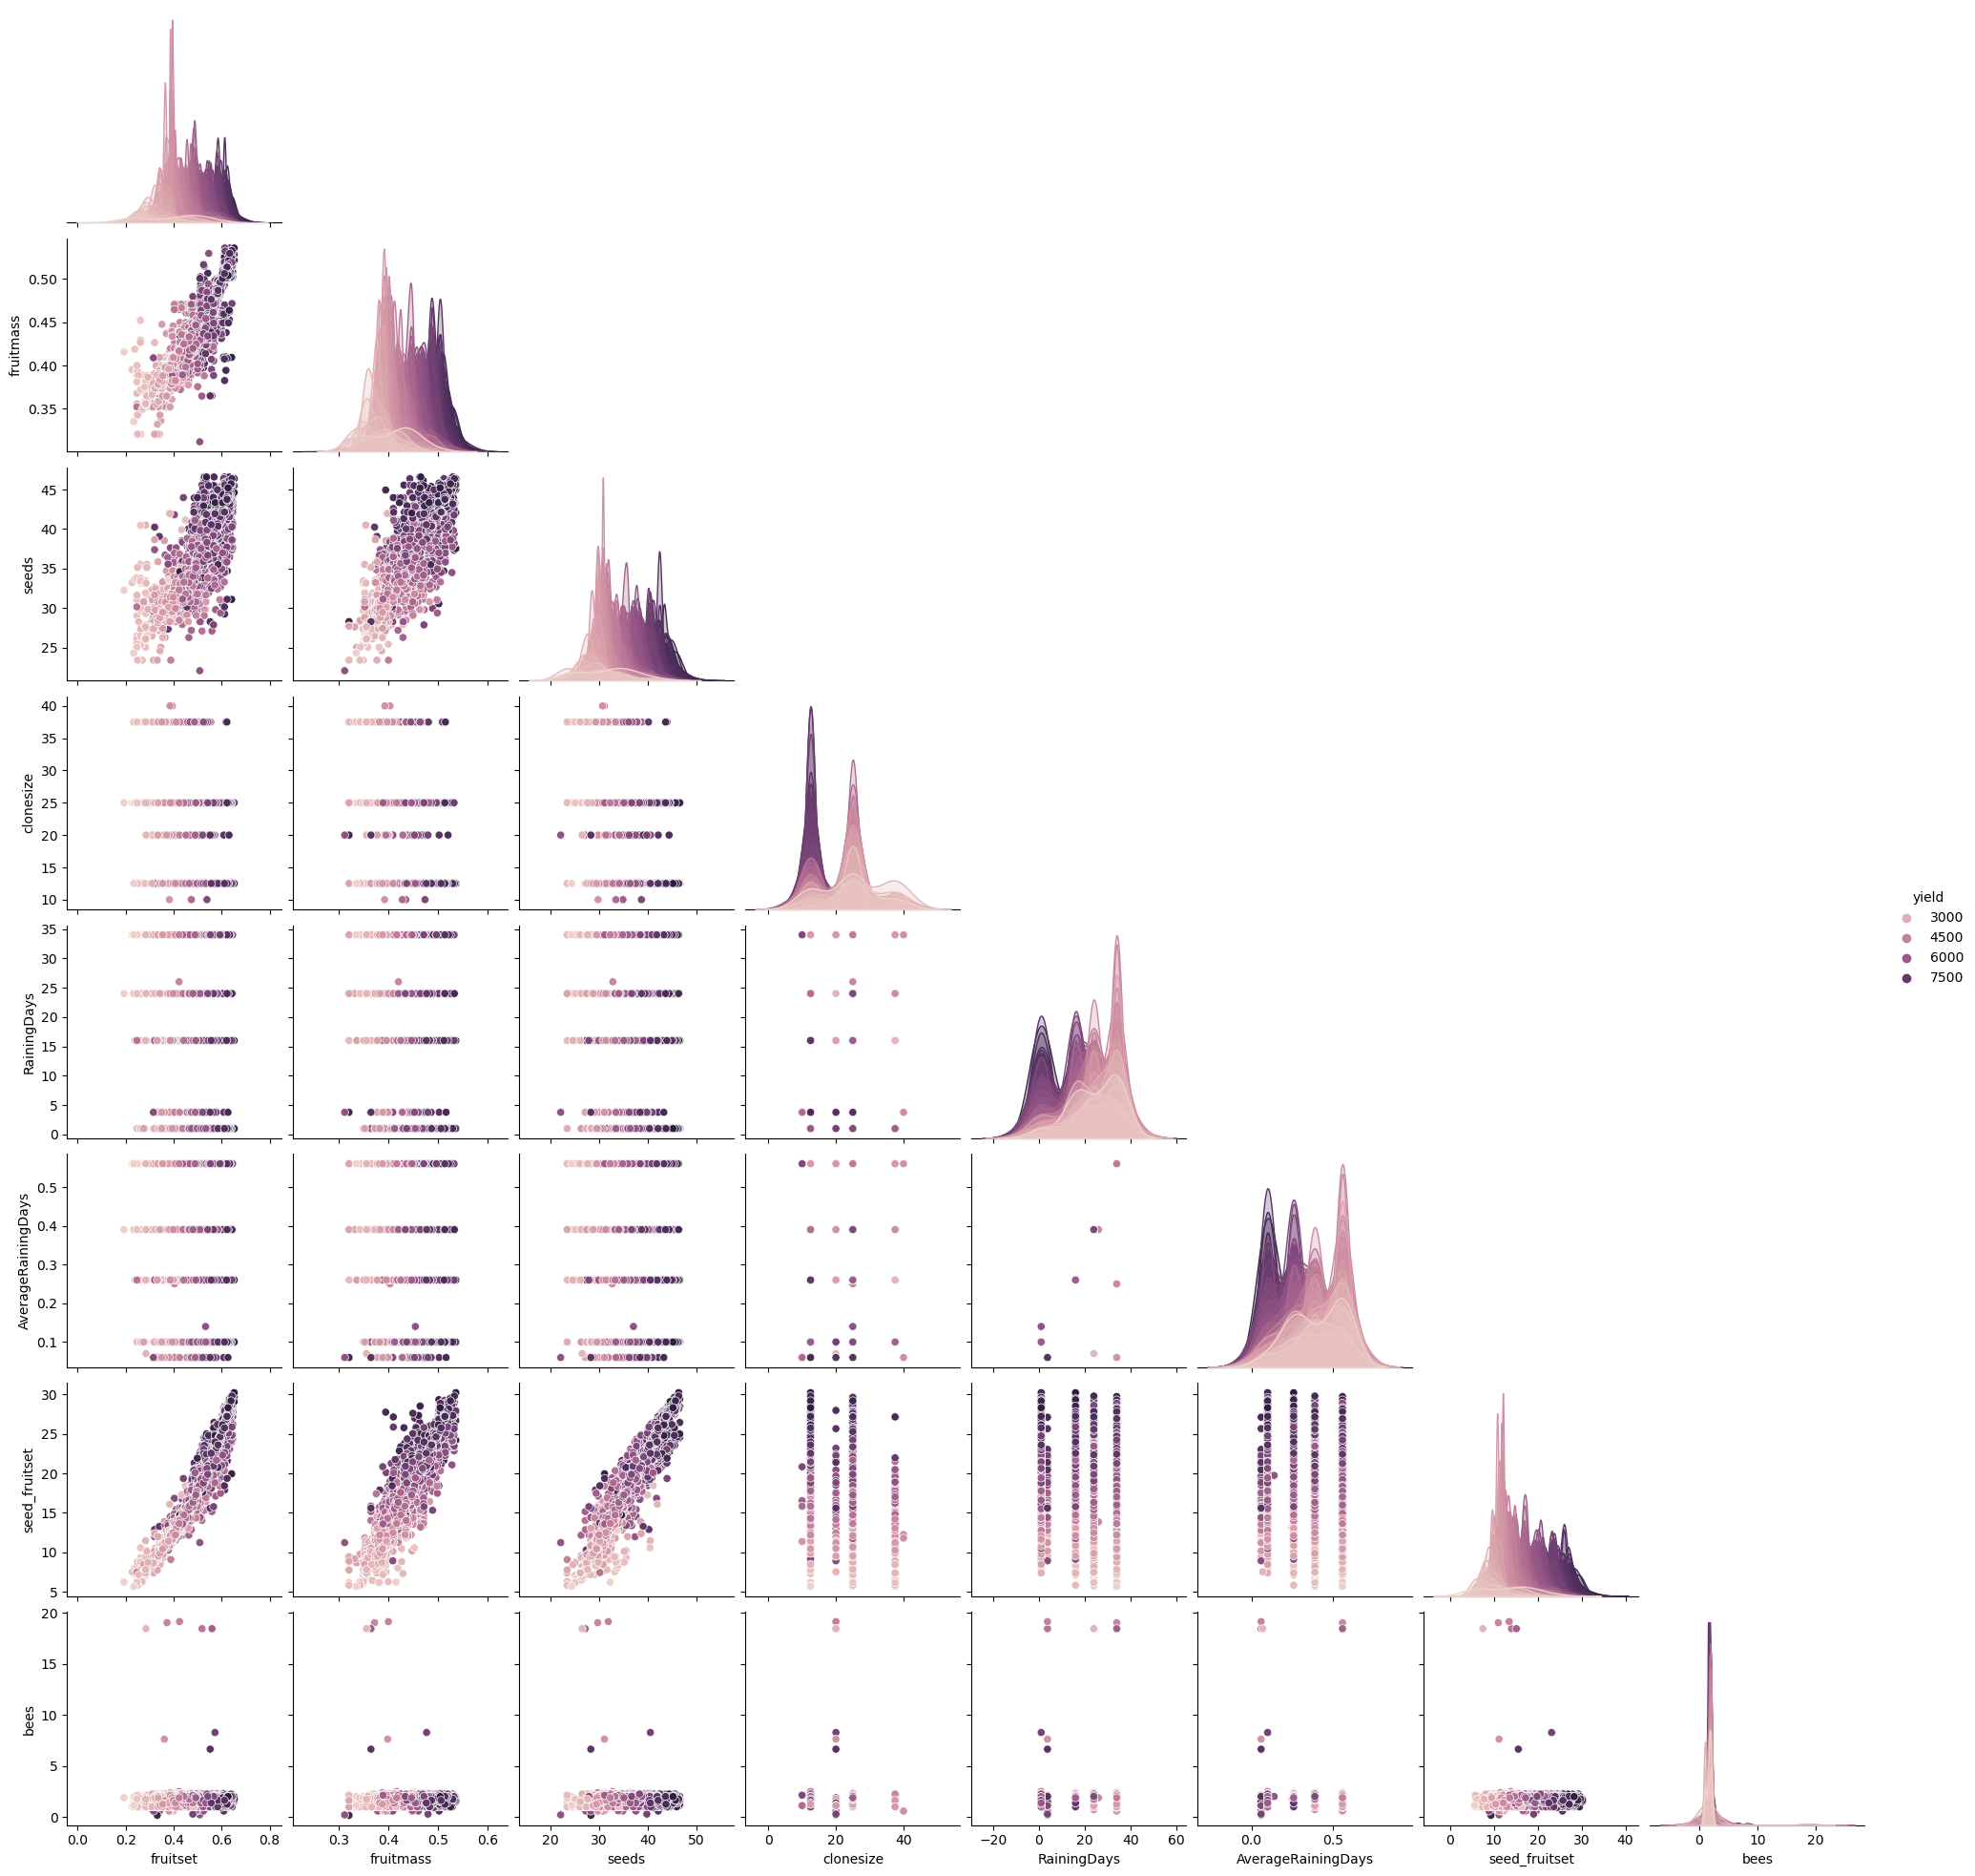

In [15]:
# generate new pairplot with correlated features and bees
temp_set = train_data[['fruitset', 'fruitmass', 'seeds', 'clonesize', 'RainingDays', 'AverageRainingDays', 'seed_fruitset', 'bees', 'yield']]
sns.pairplot(temp_set, hue='yield', corner=True)
plt.show()

We can see from the correlation plot that the two new variables, seed_fruitset and bees, have some correlations with other variables. Specifically, seed_fruitset has a positive correlation with blueberry yield and may be useful in modeling. On the other hand, bees does not visually correlate well with blueberry yield, but it may help so we will move forward with it. 

### 3. Preprocessing

In [17]:
# create filtered datasets using selected features
train_filtered = train_data[['fruitset', 'fruitmass', 'seeds', 'clonesize', 'RainingDays', 'AverageRainingDays', 'seed_fruitset', 'bees', 'yield']]
test_filtered = test_data[['fruitset', 'fruitmass', 'seeds', 'clonesize', 'RainingDays', 'AverageRainingDays', 'seed_fruitset', 'bees']]

In [18]:
# gather ID arrays for later
train_id = train_data['id']
test_id = test_data['id']

Now, we'll run through PCA to verify our feature selection from above.

In [19]:
# PCA analysis:
X = train_data.drop(['id','yield'], axis=1)
y = train_data['yield']

X_test = test_data.drop(['id'], axis=1)

# scale data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns) 
X_scaled_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

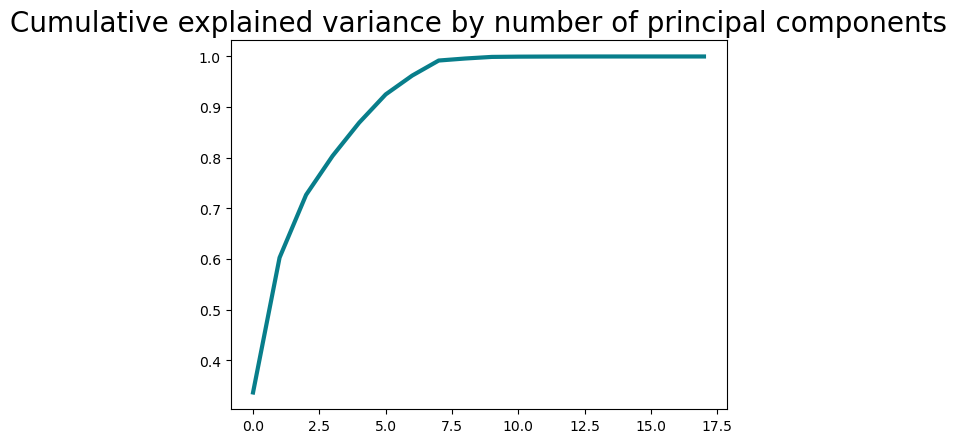

In [20]:
# train PCA model and plot explained variance vs # principal components
pca_model = PCA().fit(X_scaled)
plt.plot(pca_model.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [21]:
# retrain PCA model with selected number of components
pca_model = PCA(n_components=6)
pca_model.fit(X_scaled)
X_train_pca = pca_model.transform(X_scaled)
X_test_pca = pca_model.transform(X_scaled_test)

In [22]:
# generate datasets to use for modeling
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_train_pca)

We can see that almost 100% of the variance is explained by the first 6-7 principal components.

Now we have another filtered training and testing set that we can compare in the modeling phase.

In [23]:
# scale the sets of data (except PCA) to prepare for modeling

# full data
X = train_data.drop('yield', axis=1)
y_train = train_data['yield']

scaler = StandardScaler()
scaler.fit(X)
X_train = pd.DataFrame(scaler.transform(X),columns = X.columns)
X_test = pd.DataFrame(scaler.transform(test_data), columns = test_data.columns)


# filtered data
X = train_filtered.drop('yield', axis=1)

scaler = StandardScaler()
scaler.fit(X)
X_train_filtered = pd.DataFrame(scaler.transform(X),columns = X.columns)
X_test_filtered = pd.DataFrame(scaler.transform(test_filtered), columns = test_filtered.columns)

### 4. Modeling

Now for the modeling phase! We have 3 sets of data to test and compare. I am going to train/test a Random Forest, XGBoost, CatBoost, and LightGBM Regressors. For each data and regressor combination, we will perform parameter tuning and generate the training set mean absolute error (MAE). Because this project was done for a Kaggle competition, we were not provided with testing labels. Therefore, the predictions of what we think are the best models were submitted to the Kaggle competition to compute the testing set MAE. We will discuss these results later.

#### Random Forest Regressor

In [52]:
# full data
params = {'n_estimators':[1000], 
          'criterion':['absolute_error'],
          'max_depth':[None, 3, 4, 5, 6, 7], 
          'min_samples_split':[2,4,10],
          'min_weight_fraction_leaf':[0,1,2,4,8],
         'max_features':['sqrt', 'log2', 'auto'], 
          'min_samples_leaf':[1,5,10,50,100],
         'max_leaf_nodes':[None,2,4,8,10,20]}
regr = RandomForestRegressor(random_state=42)
regr_cv = RandomizedSearchCV(regr, params, scoring='neg_mean_absolute_error', cv=5)
regr_cv.fit(X_train,y_train)

C:\Users\tscofield\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tscofield\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tscofield\Documents\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\tscofield\Documents\Anaconda\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'criterion': ['absolute_error'],
                                        'max_depth': [None, 3, 4, 5, 6, 7],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'max_leaf_nodes': [None, 2, 4, 8, 10,
                                                           20],
                                        'min_samples_leaf': [1, 5, 10, 50, 100],
                                        'min_samples_split': [2, 4, 10],
                                        'min_weight_fraction_leaf': [0, 1, 2, 4,
                                                                     8],
                                        'n_estimators': [1000]},
                   scoring='neg_mean_absolute_error')

In [55]:
# print best parameters
print("Best Parameters: " + str(regr_cv.best_params_))

Best Parameters: {'n_estimators': 1000, 'min_weight_fraction_leaf': 0, 'min_samples_split': 10, 'min_samples_leaf': 50, 'max_leaf_nodes': 10, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'absolute_error'}


In [56]:
# train "best" model
regr_model = RandomForestRegressor(n_estimators= 1000, min_weight_fraction_leaf= 0, min_samples_split= 10,
                                   min_samples_leaf= 50, max_leaf_nodes= 10, max_features= 'log2', max_depth= 6, 
                                   criterion= 'absolute_error', random_state=42)
regr_model.fit(X_train, y_train)

y_train_regr_predict = regr_model.predict(X_train)
mae_regr = mean_absolute_error(y_train, y_train_regr_predict)
print('MAE: ' + str(mae_regr))

MAE: 410.62985222036025


#### XGBoost Regressor

In [25]:
# full data
params = {'n_estimators': [1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 5, 10, 15, 20],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3, 1],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 1],
    'reg_lambda': [0, 0.1, 0.2, 0.3, 1],
    'objective': ["reg:squarederror"],
    'eval_metric': ['mae']}
xgb_model = XGBRegressor(random_state=42)
xgb_cv = RandomizedSearchCV(xgb_model, params, scoring='neg_mean_absolute_error', cv=5)

xgb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                              

In [26]:
# print best parameters
print("Best Parameters: " + str(xgb_cv.best_params_))

Best Parameters: {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0.2, 'objective': 'reg:squarederror', 'n_estimators': 1000, 'min_child_weight': 20, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'eval_metric': 'mae', 'colsample_bytree': 0.7}


In [27]:
# train "best" model
xgb_model = XGBRegressor(subsample= 0.9, reg_lambda= 0, reg_alpha= 0.2, objective= 'reg:squarederror', n_estimators= 1000, 
                         min_child_weight= 20, max_depth= 3, learning_rate= 0.05, gamma= 0.1, eval_metric= 'mae', 
                         colsample_bytree= 0.7, random_state=42)
xgb_model.fit(X_train, y_train)

y_train_xgboost_predict = xgb_model.predict(X_train)
mae_xgboost = mean_absolute_error(y_train, y_train_xgboost_predict)
print('MAE: ' + str(mae_xgboost))

MAE: 327.8387689876147


In [28]:
# filtered data
params = {'n_estimators': [1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 5, 10, 15, 20],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3, 1],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 1],
    'reg_lambda': [0, 0.1, 0.2, 0.3, 1],
    'objective': ["reg:squarederror"],
    'eval_metric': ['mae']}
xgb_model = XGBRegressor(random_state=42)
xgb_cv = RandomizedSearchCV(xgb_model, params, scoring='neg_mean_absolute_error', cv=5)

xgb_cv.fit(X_train_filtered, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                              

In [53]:
# print best parameters
print("Best Parameters: " + str(xgb_cv.best_params_))

Best Parameters: {'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0.3, 'objective': 'reg:squarederror', 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.1, 'eval_metric': 'mae', 'colsample_bytree': 0.9}


In [57]:
# train "best" model
xgb_model = XGBRegressor(subsample= 0.5, reg_lambda= 0, reg_alpha= 0.3, objective= 'reg:squarederror', n_estimators= 1000, 
                         min_child_weight= 1, max_depth= 6, learning_rate= 0.01, gamma= 0.1, eval_metric= 'mae', 
                         colsample_bytree= 0.9, random_state=42)
xgb_model.fit(X_train_filtered, y_train)

y_train_xgboost_predict = xgb_model.predict(X_train_filtered)
mae_xgboost = mean_absolute_error(y_train, y_train_xgboost_predict)
print('MAE: ' + str(mae_xgboost))

MAE: 307.6364701103939


In [36]:
# pca data
params = {'n_estimators': [1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 5, 10, 15, 20],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0, 0.1, 0.2, 0.3, 1],
    'reg_alpha': [0, 0.1, 0.2, 0.3, 1],
    'reg_lambda': [0, 0.1, 0.2, 0.3, 1],
    'objective': ["reg:squarederror"],
    'eval_metric': ['mae']}
xgb_model = XGBRegressor(random_state=42)
xgb_cv = RandomizedSearchCV(xgb_model, params, scoring='neg_mean_absolute_error', cv=5)

xgb_cv.fit(X_train_pca, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                              

In [37]:
# print best parameters
print("Best Parameters: " + str(xgb_cv.best_params_))

Best Parameters: {'subsample': 0.5, 'reg_lambda': 0, 'reg_alpha': 0.3, 'objective': 'reg:squarederror', 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0.1, 'eval_metric': 'mae', 'colsample_bytree': 0.9}


In [38]:
# train "best" model
xgb_model = XGBRegressor(subsample= 0.5, reg_lambda= 0, reg_alpha= 0.3, objective= 'reg:squarederror', n_estimators= 1000, 
                         min_child_weight= 1, max_depth= 6, learning_rate= 0.01, gamma= 0.1, eval_metric= 'mae', 
                         colsample_bytree= 0.9, random_state=42)
xgb_model.fit(X_train_pca, y_train)

y_train_xgboost_predict = xgb_model.predict(X_train_pca)
mae_xgboost = mean_absolute_error(y_train, y_train_xgboost_predict)
print('MAE: ' + str(mae_xgboost))

MAE: 336.7084870240706


#### CatBoost Regressor

In [40]:
# full data
params = {'iterations': [1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 11, 16],
    'l2_leaf_reg': [0, 0.01, 0.05, 0.1, 0.5, 1],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bylevel': [0.5, 0.7, 0.9],
    'random_strength': [0.05, 0.1, 0.2],
    'bagging_temperature': [0.1, 0.5, 1],
    'loss_function': ['MAE'],
    'verbose': [False],
    'grow_policy': ["Lossguide"]}
cat_model = CatBoostRegressor(random_state=42)
cat_cv = RandomizedSearchCV(cat_model, params, scoring='neg_mean_absolute_error', cv=5)

cat_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001F94CF5DFD0>,
                   param_distributions={'bagging_temperature': [0.1, 0.5, 1],
                                        'colsample_bylevel': [0.5, 0.7, 0.9],
                                        'depth': [4, 6, 11, 16],
                                        'grow_policy': ['Lossguide'],
                                        'iterations': [1000],
                                        'l2_leaf_reg': [0, 0.01, 0.05, 0.1, 0.5,
                                                        1],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'loss_function': ['MAE'],
                                        'random_strength': [0.05, 0.1, 0.2],
                                        'subsample': [0.5, 0.7, 0.9],
                                        'verbose': [False]},
                   scoring='neg_mean_a

In [41]:
# print best parameters
print("Best Parameters: " + str(cat_cv.best_params_))

Best Parameters: {'verbose': False, 'subsample': 0.9, 'random_strength': 0.05, 'loss_function': 'MAE', 'learning_rate': 0.01, 'l2_leaf_reg': 0, 'iterations': 1000, 'grow_policy': 'Lossguide', 'depth': 16, 'colsample_bylevel': 0.7, 'bagging_temperature': 0.1}


In [61]:
# train "best" model
cat_model = CatBoostRegressor(verbose= False, subsample= 0.9, random_strength= 0.05, loss_function= 'MAE', learning_rate= 0.01,
                              l2_leaf_reg= 0, iterations= 1000, grow_policy= 'Lossguide', depth= 16, colsample_bylevel= 0.7,
                              bagging_temperature= 0.1, random_state=42)
cat_model.fit(X_train, y_train)

y_train_catboost_predict = cat_model.predict(X_train)
mae_catboost = mean_absolute_error(y_train, y_train_catboost_predict)
print('MAE: ' + str(mae_catboost))

MAE: 317.3949690787945


In [44]:
# filtered data
params = {'iterations': [1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 11, 16],
    'l2_leaf_reg': [0, 0.01, 0.05, 0.1, 0.5, 1],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bylevel': [0.5, 0.7, 0.9],
    'random_strength': [0.05, 0.1, 0.2],
    'bagging_temperature': [0.1, 0.5, 1],
    'loss_function': ['MAE'],
    'verbose': [False],
    'grow_policy': ["Lossguide"]}
cat_model = CatBoostRegressor(random_state=42)
cat_cv = RandomizedSearchCV(cat_model, params, scoring='neg_mean_absolute_error', cv=5)

cat_cv.fit(X_train_filtered, y_train)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001F95DA2E1F0>,
                   param_distributions={'bagging_temperature': [0.1, 0.5, 1],
                                        'colsample_bylevel': [0.5, 0.7, 0.9],
                                        'depth': [4, 6, 11, 16],
                                        'grow_policy': ['Lossguide'],
                                        'iterations': [1000],
                                        'l2_leaf_reg': [0, 0.01, 0.05, 0.1, 0.5,
                                                        1],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'loss_function': ['MAE'],
                                        'random_strength': [0.05, 0.1, 0.2],
                                        'subsample': [0.5, 0.7, 0.9],
                                        'verbose': [False]},
                   scoring='neg_mean_a

In [45]:
# print best parameters
print("Best Parameters: " + str(cat_cv.best_params_))

Best Parameters: {'verbose': False, 'subsample': 0.9, 'random_strength': 0.05, 'loss_function': 'MAE', 'learning_rate': 0.01, 'l2_leaf_reg': 0.01, 'iterations': 1000, 'grow_policy': 'Lossguide', 'depth': 16, 'colsample_bylevel': 0.9, 'bagging_temperature': 0.5}


In [65]:
# train "best" model
cat_model = CatBoostRegressor(verbose= False, subsample= 0.9, random_strength= 0.05, loss_function= 'MAE', learning_rate= 0.01,
                              l2_leaf_reg= 0.01, iterations= 1000, grow_policy= 'Lossguide', depth= 16, colsample_bylevel= 0.9,
                              bagging_temperature= 0.5, random_state=42)
cat_model.fit(X_train_filtered, y_train)

y_train_catboost_predict = cat_model.predict(X_train_filtered)
mae_catboost = mean_absolute_error(y_train, y_train_catboost_predict)
print('MAE: ' + str(mae_catboost))

MAE: 319.47325510715024


In [47]:
# pca data
params = {'iterations': [1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 11, 16],
    'l2_leaf_reg': [0, 0.01, 0.05, 0.1, 0.5, 1],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bylevel': [0.5, 0.7, 0.9],
    'random_strength': [0.05, 0.1, 0.2],
    'bagging_temperature': [0.1, 0.5, 1],
    'loss_function': ['MAE'],
    'verbose': [False],
    'grow_policy': ["Lossguide"]}
cat_model = CatBoostRegressor(random_state=42)
cat_cv = RandomizedSearchCV(cat_model, params, scoring='neg_mean_absolute_error', cv=5)

cat_cv.fit(X_train_pca, y_train)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001F95DB720A0>,
                   param_distributions={'bagging_temperature': [0.1, 0.5, 1],
                                        'colsample_bylevel': [0.5, 0.7, 0.9],
                                        'depth': [4, 6, 11, 16],
                                        'grow_policy': ['Lossguide'],
                                        'iterations': [1000],
                                        'l2_leaf_reg': [0, 0.01, 0.05, 0.1, 0.5,
                                                        1],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'loss_function': ['MAE'],
                                        'random_strength': [0.05, 0.1, 0.2],
                                        'subsample': [0.5, 0.7, 0.9],
                                        'verbose': [False]},
                   scoring='neg_mean_a

In [48]:
# print best parameters
print("Best Parameters: " + str(cat_cv.best_params_))

Best Parameters: {'verbose': False, 'subsample': 0.5, 'random_strength': 0.1, 'loss_function': 'MAE', 'learning_rate': 0.01, 'l2_leaf_reg': 0, 'iterations': 1000, 'grow_policy': 'Lossguide', 'depth': 6, 'colsample_bylevel': 0.7, 'bagging_temperature': 0.5}


In [49]:
# train "best" model
cat_model = CatBoostRegressor(verbose= False, subsample= 0.5, random_strength= 0.1, loss_function= 'MAE', learning_rate= 0.01,
                              l2_leaf_reg= 0, iterations= 1000, grow_policy= 'Lossguide', depth= 6, colsample_bylevel= 0.7,
                              bagging_temperature= 0.5, random_state=42)
cat_model.fit(X_train_pca, y_train)

y_train_catboost_predict = cat_model.predict(X_train_pca)
mae_catboost = mean_absolute_error(y_train, y_train_catboost_predict)
print('MAE: ' + str(mae_catboost))

MAE: 357.9711028861033


#### LightGBM Regressor

In [79]:
# full set
params = {'n_estimators': [1000],
            'max_depth': [4,6,11,13,16],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.5, 0.7, 0.9],
            'colsample_bytree': [0.5, 0.7, 0.9],
            'reg_lambda': [0, 1e-8, 1e-6, 1e-3],
            'objective': ['regression_l1'],
            'metric': ['mean_absolute_error'],
            'boosting_type': ['gbdt']}
light_model = ltb.LGBMRegressor(random_state=42)
light_cv = RandomizedSearchCV(light_model, params, scoring='neg_mean_absolute_error', cv=5)

light_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [4, 6, 11, 13, 16],
                                        'metric': ['mean_absolute_error'],
                                        'n_estimators': [1000],
                                        'objective': ['regression_l1'],
                                        'reg_lambda': [0, 1e-08, 1e-06, 0.001],
                                        'subsample': [0.5, 0.7, 0.9]},
                   scoring='neg_mean_absolute_error')

In [80]:
# print best parameters
print("Best Parameters: " + str(light_cv.best_params_))

Best Parameters: {'subsample': 0.9, 'reg_lambda': 1e-06, 'objective': 'regression_l1', 'n_estimators': 1000, 'metric': 'mean_absolute_error', 'max_depth': 16, 'learning_rate': 0.01, 'colsample_bytree': 0.9, 'boosting_type': 'gbdt'}


In [89]:
# train "best" model
light_model = ltb.LGBMRegressor(subsample= 0.9, reg_lambda= 1e-06, objective= 'regression_l1', n_estimators= 1000, 
                            metric= 'mean_absolute_error', max_depth= 16, learning_rate= 0.01, colsample_bytree= 0.9, 
                            boosting_type= 'gbdt', random_state=42)
light_model.fit(X_train, y_train)

y_train_lgbm_predict = light_model.predict(X_train)
mae_lgbm = mean_absolute_error(y_train, y_train_lgbm_predict)
print('MAE: ' + str(mae_lgbm))

MAE: 319.00662427979137


In [83]:
# filtered set
light_cv.fit(X_train_filtered, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [4, 6, 11, 13, 16],
                                        'metric': ['mean_absolute_error'],
                                        'n_estimators': [1000],
                                        'objective': ['regression_l1'],
                                        'reg_lambda': [0, 1e-08, 1e-06, 0.001],
                                        'subsample': [0.5, 0.7, 0.9]},
                   scoring='neg_mean_absolute_error')

In [84]:
# print best parameters
print("Best Parameters: " + str(light_cv.best_params_))

Best Parameters: {'subsample': 0.5, 'reg_lambda': 0.001, 'objective': 'regression_l1', 'n_estimators': 1000, 'metric': 'mean_absolute_error', 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.9, 'boosting_type': 'gbdt'}


In [85]:
# train "best" model
light_model = ltb.LGBMRegressor(subsample= 0.5, reg_lambda= 0.001, objective= 'regression_l1', n_estimators= 1000, 
                            metric= 'mean_absolute_error', max_depth= 6, learning_rate= 0.05, colsample_bytree= 0.9, 
                            boosting_type= 'gbdt', random_state=42)
light_model.fit(X_train_filtered, y_train)

y_train_lgbm_predict = light_model.predict(X_train_filtered)
mae_lgbm = mean_absolute_error(y_train, y_train_lgbm_predict)
print('MAE: ' + str(mae_lgbm))

MAE: 302.9961089133537


#### Predict on Test Set

The next 3 lines of code were computed for many of the models, exported, and then imported into the Kaggle system. The example shown below is for the LightGBM model trained with the full data set. 

In [90]:
# predict on testing set
predicted_yield = light_model.predict(X_test)

In [91]:
# create prediction dataframe
prediction_df = pd.DataFrame(test_id)
prediction_df['yield'] = predicted_yield.tolist()
prediction_df

id        yield
0      15289  4294.539630
1      15290  5903.857678
2      15291  7216.670328
3      15292  4767.716380
4      15293  3784.466424
...      ...          ...
10189  25478  5391.780375
10190  25479  5630.694562
10191  25480  6550.124187
10192  25481  4420.718513
10193  25482  7266.859800

[10194 rows x 2 columns]

In [92]:
# export dataframe
prediction_df.to_csv('prediction.csv', index=False)

### 5. Conclusion

The method that Kaggle uses for their competitions is that they generate a testing score on some of the data during the competition, and then they create a final score on the remaining data at the deadline. The top 4 final testing results are as follow: CatBoost with full dataset, 342.3; LightGBM with full dataset, 343.1; CatBoost with the filtered dataset, 345.0; and LightGBM with the filtered data, 346.0. The corresponding training results can be found in the table below. 

Given that all training errors are less than the testing errors, there has been some overfitting in the models. This can especially be seen with the LightGBM model with the filtered data as this model has the lowest training MAE but the highest testing MAE of the sample. 

Of the four regression models tested in this project, it is clear from the results that CatBoost and LightGBM were most succesful in their models. Furthermore, both the full data and the filtered data performed similarly where the full data had a very slight edge in MAE. However, the time to train and test models with the full data is slightly longer given the number of features; therefore, the marginal decrease in MAE may be defeated by the time it takes for the full data. Also, the PCA models never competed with the other data sets. It was a good idea in theory, however, the MAE were never good enough to move forward with.

In [27]:
data = {'Test MAE': [342.3, 343.1, 345.0, 346.0],
        'Train MAE': [317.4, 319.0, 319.5, 303.0]}
df = pd.DataFrame(data, index=['CatBoost w/ full', 'LightGBM w/ full', 'CatBoost w/ filtered', 'LightGBM w/ filtered'])
df

Test MAE  Train MAE
CatBoost w/ full         342.3      317.4
LightGBM w/ full         343.1      319.0
CatBoost w/ filtered     345.0      319.5
LightGBM w/ filtered     346.0      303.0